In [290]:
!echo $SHELL
!echo $PATH
!echo $JOURNAL_ROOT

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.ERROR)
import random
random.seed(0)
import os

import dotenv

dotenv.load_dotenv()

import pprint
from pprint import pp 
pprint.pp(dict(os.environ))

os.getenv('JOURNAL_ROOT')

import seaborn as sns

import src.journal as jr

from src.analysis import *
import analysis

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

!rm -rf output
logger = logging.getLogger()


logger.setLevel(logging.ERROR)
logging.getLogger().setLevel(logging.WARNING)

def mode_debug():
    logging.getLogger().setLevel(logging.DEBUG)
def mode_info():
    logging.getLogger().setLevel(logging.INFO)
def mode_warn():
    logging.getLogger().setLevel(logging.WARN)
def mode_err():
    logging.getLogger().setLevel(logging.ERROR)



/bin/zsh
/Users/tobiaspucher/miniconda3/bin:/opt/homebrew/opt/node@22/bin:/Users/tobiaspucher/miniconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/Apple/usr/bin:/Library/TeX/texbin:/Users/tobiaspucher/.cargo/bin:/Users/tobiaspucher/.local/bin:/Users/tobiaspucher/Library/Application Support/JetBrains/Toolbox/scripts:/Users/tobiaspucher/.lmstudio/bin
/Users/tobiaspucher/Library/CloudStorage/OneDrive-Personal/2025/trade_journal
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'COMMAND_MODE': 'unix2003',
 'CONDA_EXE': '/Users/tobiaspucher/miniconda3/bin/conda',
 'CONDA_PYTHON_EXE': '/Users/tobiaspucher/miniconda3/bin/python',
 'CONDA_SHLVL': '1

In [291]:
# grab just last row
df = jr.get_full_df()

display(df.tail(4))

display(df.describe())

print(df.columns)
print(df.dtypes)

# report Nans for each column
print('Nans:')
print(df.isna().sum())

# report Nans for each column as percentage
print('Nans as percentage:')
print(df.isna().sum() / df.shape[0])


,trade_uid,poi,tp_price,potential_return,type_1_m5,SL_distance,entry_price,type_1_m15,return,session,management_strategy,initial_return,side,poi_1m_mitigation,outcome,close_price,poi_15m_liquidity_grab,type_3_m1,numerical_confidence,poi_15m_sc,rr,poi_1h_mitigation,entry_time,poi_15m_mitigation,TP_distance,poi_1m_sc,poi_1h_liquidity_grab,potential_price,sl_price,poi_1h_sc,potential_risk_reward,taken,htf_poi_ltf_confirmation,initial_risk_reward,account,poi_1m_liquidity_grab,htf_poi_ltf_confirmation_True,session_new_york,management_strategy_be_after_push,management_strategy_no_management,side_long,side_short,outcome_win
0,2,"(NO_POI,)",3000.00,NaN,<NA>,3.09,2914.03,<NA>,NaN,new_york,no_management,85.97,long,False,NaN,NaN,False,<NA>,NaN,False,NaN,False,2025-02-18 14:10:00,False,85.97,False,False,NaN,2910.94,False,NaN,True,<NA>,27.822006,mt5_vantage,False,False,True,False,True,True,False,False
1,4,"(poi_1h_sc, poi_1m_sc, poi_1h_liquidity_grab)",22105.27,-564.4,True,-14.69,22164.40,True,-59.13,new_york,be_after_push,-59.13,short,False,win,22105.27,False,True,5.0,False,4.025187,False,2025-02-22 15:11:00,False,-59.13,True,True,21600.0,22179.09,True,38.420694,<NA>,True,4.025187,ideal,False,True,True,True,False,False,True,True
2,5,"(NO_POI,)",NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,no_management,NaN,NaN,False,NaN,NaN,False,<NA>,NaN,False,NaN,False,NaT,False,NaN,False,False,NaN,NaN,False,NaN,<NA>,<NA>,NaN,None,False,False,False,False,True,False,False,False


,tp_price,potential_return,SL_distance,entry_price,return,initial_return,close_price,numerical_confidence,rr,entry_time,TP_distance,potential_price,sl_price,potential_risk_reward,initial_risk_reward
count,2.000000,1.0,2.000000,2.000000,1.00,2.000000,1.00,1.0,1.000000,2,2.000000,1.0,2.000000,1.000000,2.000000
mean,12552.635000,-564.4,-5.800000,12539.215000,-59.13,13.420000,22105.27,5.0,4.025187,2025-02-20 14:40:30,13.420000,21600.0,12545.015000,38.420694,15.923597
min,3000.000000,-564.4,-14.690000,2914.030000,-59.13,-59.130000,22105.27,5.0,4.025187,2025-02-18 14:10:00,-59.130000,21600.0,2910.940000,38.420694,4.025187
25%,7776.317500,-564.4,-10.245000,7726.622500,-59.13,-22.855000,22105.27,5.0,4.025187,2025-02-19 14:25:15,-22.855000,21600.0,7727.977500,38.420694,9.974392
50%,12552.635000,-564.4,-5.800000,12539.215000,-59.13,13.420000,22105.27,5.0,4.025187,2025-02-20 14:40:30,13.420000,21600.0,12545.015000,38.420694,15.923597
75%,17328.952500,-564.4,-1.355000,17351.807500,-59.13,49.695000,22105.27,5.0,4.025187,2025-02-21 14:55:45,49.695000,21600.0,17362.052500,38.420694,21.872802
max,22105.270000,-564.4,3.090000,22164.400000,-59.13,85.970000,22105.27,5.0,4.025187,2025-02-22 15:11:00,85.970000,21600.0,22179.090000,38.420694,27.822006
std,13509.465973,NaN,12.572359,13612.067167,NaN,102.601194,NaN,NaN,NaN,NaN,102.601194,NaN,13624.639526,NaN,16.826892


Index(['trade_uid', 'poi', 'tp_price', 'potential_return', 'type_1_m5',
       'SL_distance', 'entry_price', 'type_1_m15', 'return', 'session',
       'management_strategy', 'initial_return', 'side', 'poi_1m_mitigation',
       'outcome', 'close_price', 'poi_15m_liquidity_grab', 'type_3_m1',
       'numerical_confidence', 'poi_15m_sc', 'rr', 'poi_1h_mitigation',
       'entry_time', 'poi_15m_mitigation', 'TP_distance', 'poi_1m_sc',
       'poi_1h_liquidity_grab', 'potential_price', 'sl_price', 'poi_1h_sc',
       'potential_risk_reward', 'taken', 'htf_poi_ltf_confirmation',
       'initial_risk_reward', 'account', 'poi_1m_liquidity_grab',
       'htf_poi_ltf_confirmation_True', 'session_new_york',
       'management_strategy_be_after_push',
       'management_strategy_no_management', 'side_long', 'side_short',
       'outcome_win'],
      dtype='object')
trade_uid                                    object
poi                                          object
tp_price                     

In [292]:
from analysis import *
import analysis
import journal
import strategy
import features as f

mode_warn()

df = jr.j.to_dataframe().copy()
#display(df.tail())


def prepare_data(df:pd.DataFrame):
    df = df.rename(columns={'return': 'return_points'})
    df = df[(df['account'] != journal.ACC_TEST) & (True)]
    
    return df

df = prepare_data(df)
 
type_X_cols = f.PA.used_tags_in_df_not_null(df)
#print(type_X_cols)

fixed_columns = ['trade_uid', 'entry_time', ]  # Columns to fixate at the beginning
class_order = [f.Outcome, f.Account, f.POI]  # Define the order of classes

df = f.reorder_dataframe_columns(df, fixed_columns, class_order)
display(df)


TECHNICAL_TAGS = fixed_columns + ['outcome', 'taken', 'entry_price', 'tp_price', 'sl_price', 'SL_distance', 'TP_distance', 'close_price',  'rr',
                                   'return_points', 'potential_price', 'potential_risk_reward', 'poi', 'numerical_confidence']

minidf = df[TECHNICAL_TAGS]

minidf

,trade_uid,entry_time,outcome,account,poi_1h_sc,poi_1h_liquidity_grab,poi_1h_mitigation,poi_15m_sc,poi_15m_liquidity_grab,poi_15m_mitigation,poi_1m_sc,poi_1m_liquidity_grab,poi_1m_mitigation,poi,tp_price,potential_return,type_1_m5,SL_distance,entry_price,type_1_m15,return_points,session,management_strategy,initial_return,side,close_price,type_3_m1,numerical_confidence,rr,TP_distance,potential_price,sl_price,potential_risk_reward,taken,htf_poi_ltf_confirmation,initial_risk_reward,htf_poi_ltf_confirmation_True,session_new_york,management_strategy_be_after_push,management_strategy_no_management,side_long,side_short,outcome_win
0,2,2025-02-18 14:10:00,NaN,mt5_vantage,False,False,False,False,False,False,False,False,False,"(NO_POI,)",3000.00,NaN,<NA>,3.09,2914.03,<NA>,NaN,new_york,no_management,85.97,long,NaN,<NA>,NaN,NaN,85.97,NaN,2910.94,NaN,True,<NA>,27.822006,False,True,False,True,True,False,False
1,4,2025-02-22 15:11:00,win,ideal,True,True,False,False,False,False,True,False,False,"(poi_1h_sc, poi_1m_sc, poi_1h_liquidity_grab)",22105.27,-564.4,True,-14.69,22164.40,True,-59.13,new_york,be_after_push,-59.13,short,22105.27,True,5.0,4.025187,-59.13,21600.0,22179.09,38.420694,<NA>,True,4.025187,True,True,True,False,False,True,True
2,5,NaT,NaN,None,False,False,False,False,False,False,False,False,False,"(NO_POI,)",NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,no_management,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,False,False,False,True,False,False,False


,trade_uid,entry_time,outcome,taken,entry_price,tp_price,sl_price,SL_distance,TP_distance,close_price,rr,return_points,potential_price,potential_risk_reward,poi,numerical_confidence
0,2,2025-02-18 14:10:00,NaN,True,2914.03,3000.00,2910.94,3.09,85.97,NaN,NaN,NaN,NaN,NaN,"(NO_POI,)",NaN
1,4,2025-02-22 15:11:00,win,<NA>,22164.40,22105.27,22179.09,-14.69,-59.13,22105.27,4.025187,-59.13,21600.0,38.420694,"(poi_1h_sc, poi_1m_sc, poi_1h_liquidity_grab)",5.0
2,5,NaT,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(NO_POI,)",NaN


In [293]:
mode_warn()

def sanity_check_all(**kwargs):
    f.RiskManagement.sanity_check(df, **kwargs)
    f.Outcome.sanity_check(df, **kwargs)
    f.POI.sanity_check(df, **kwargs)
    f.Account.sanity_check(df, **kwargs)
    strategy.StrategyV1().sanity_check(df, **kwargs)
    
sanity_check_all()

 OK - RiskManagement sanity check: (pass) 
 OK - Outcome sanity check: (pass) 
 OK - POI sanity check:  
 FAILED - Account sanity check: valid_ratio=0.67 to low (to many nans) 
 OK: StrategyV1 


In [294]:
f.POI.summary(df)

Summary of POIs:
Used POIs: poi_1m_sc, poi_1h_liquidity_grab, poi_15m_liquidity_grab, poi_1h_sc, poi_15m_sc, poi_1h_mitigation, poi_1m_liquidity_grab, poi_15m_mitigation, poi_1m_mitigation
Not Used POIs: No, i.e All POIs are used


In [295]:

display(df['entry_time'])

calculate_performance_metrics(df)

0   2025-02-18 14:10:00
1   2025-02-22 15:11:00
2                   NaT
Name: entry_time, dtype: datetime64[ns]

Total Trades                  3.000000
Total Return                -59.130000
Average Return              -59.130000
Max Return Drawdown           0.000000
Total Risk Reward Ratio       4.025187
Average Risk Reward Ratio     4.025187
Max Risk Reward Ratio         4.025187
Min Risk Reward Ratio         4.025187
Win Rate (%)                  0.333333
Average Win RR                4.025187
Max Win RR                    4.025187
Min Win RR                    4.025187
dtype: float64

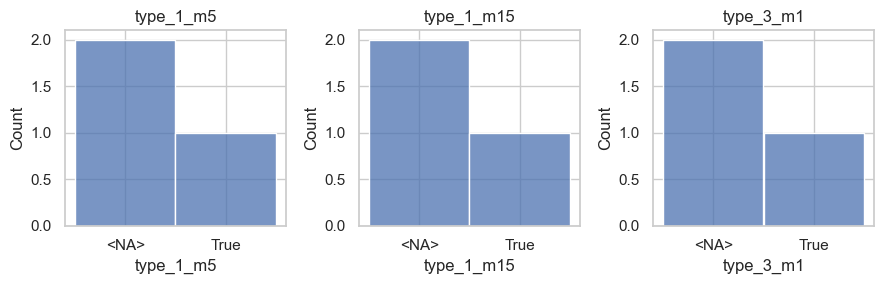

In [296]:
plot_feature_distributions(df, type_X_cols,)

In [297]:
df

,trade_uid,entry_time,outcome,account,poi_1h_sc,poi_1h_liquidity_grab,poi_1h_mitigation,poi_15m_sc,poi_15m_liquidity_grab,poi_15m_mitigation,poi_1m_sc,poi_1m_liquidity_grab,poi_1m_mitigation,poi,tp_price,potential_return,type_1_m5,SL_distance,entry_price,type_1_m15,return_points,session,management_strategy,initial_return,side,close_price,type_3_m1,numerical_confidence,rr,TP_distance,potential_price,sl_price,potential_risk_reward,taken,htf_poi_ltf_confirmation,initial_risk_reward,htf_poi_ltf_confirmation_True,session_new_york,management_strategy_be_after_push,management_strategy_no_management,side_long,side_short,outcome_win
0,2,2025-02-18 14:10:00,NaN,mt5_vantage,False,False,False,False,False,False,False,False,False,"(NO_POI,)",3000.00,NaN,<NA>,3.09,2914.03,<NA>,NaN,new_york,no_management,85.97,long,NaN,<NA>,NaN,NaN,85.97,NaN,2910.94,NaN,True,<NA>,27.822006,False,True,False,True,True,False,False
1,4,2025-02-22 15:11:00,win,ideal,True,True,False,False,False,False,True,False,False,"(poi_1h_sc, poi_1m_sc, poi_1h_liquidity_grab)",22105.27,-564.4,True,-14.69,22164.40,True,-59.13,new_york,be_after_push,-59.13,short,22105.27,True,5.0,4.025187,-59.13,21600.0,22179.09,38.420694,<NA>,True,4.025187,True,True,True,False,False,True,True
2,5,NaT,NaN,None,False,False,False,False,False,False,False,False,False,"(NO_POI,)",NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,no_management,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,False,False,False,True,False,False,False


In [298]:
import analysis
import features
import trade

#logging.getLogger().setLevel(logging.DEBUG)
logging.getLogger().setLevel(logging.WARNING)

def summarize_trade(trade: jr.Trade, df: pd.DataFrame):    
    df = df[df['trade_uid'] == trade.uid]
    if len(df) == 0:
        logging.warning(f"Trade {trade.uid} not found in df")
    display(df)
    display(trade)
    
    pp(trade.get_tags_dict())
    
    features = used_feature_classes(df)
    
    print(f"Features: {features}")
    pp(features)
    
    
summarize_trade(jr.j.trades[0], df)


,trade_uid,entry_time,outcome,account,poi_1h_sc,poi_1h_liquidity_grab,poi_1h_mitigation,poi_15m_sc,poi_15m_liquidity_grab,poi_15m_mitigation,poi_1m_sc,poi_1m_liquidity_grab,poi_1m_mitigation,poi,tp_price,potential_return,type_1_m5,SL_distance,entry_price,type_1_m15,return_points,session,management_strategy,initial_return,side,close_price,type_3_m1,numerical_confidence,rr,TP_distance,potential_price,sl_price,potential_risk_reward,taken,htf_poi_ltf_confirmation,initial_risk_reward,htf_poi_ltf_confirmation_True,session_new_york,management_strategy_be_after_push,management_strategy_no_management,side_long,side_short,outcome_win
0,2,2025-02-18 14:10:00,NaN,mt5_vantage,False,False,False,False,False,False,False,False,False,"(NO_POI,)",3000.0,NaN,<NA>,3.09,2914.03,<NA>,NaN,new_york,no_management,85.97,long,NaN,<NA>,NaN,NaN,85.97,NaN,2910.94,NaN,True,<NA>,27.822006,False,True,False,True,True,False,False


Trade(uid='2', tags=[Tag(timestamp=None, key='taken', value=True), Tag(timestamp=None, key='account', value='mt5_vantage'), Tag(timestamp=None, key='entry_time', value=Timestamp('2025-02-18 14:10:00')), Tag(timestamp=None, key='entry_price', value=2914.03), Tag(timestamp=None, key='sl_price', value=2910.94), Tag(timestamp=None, key='tp_price', value=3000.0), Tag(timestamp=None, key='SL_distance', value=3.0900000000001455), Tag(timestamp=None, key='TP_distance', value=85.9699999999998), Tag(timestamp=None, key='side', value='long'), Tag(timestamp=None, key='session', value='new_york'), Tag(timestamp=None, key='initial_risk_reward', value=27.822006472490536), Tag(timestamp=None, key='initial_return', value=85.9699999999998), Tag(timestamp=None, key='management_strategy', value='no_management'), Tag(timestamp=None, key='poi', value=('NO_POI',)), Tag(timestamp=None, key='poi_1h_sc', value=False), Tag(timestamp=None, key='poi_1h_liquidity_grab', value=False), Tag(timestamp=None, key='poi_1h

{'taken': True,
 'account': 'mt5_vantage',
 'entry_time': Timestamp('2025-02-18 14:10:00'),
 'entry_price': 2914.03,
 'sl_price': 2910.94,
 'tp_price': 3000.0,
 'SL_distance': 3.0900000000001455,
 'TP_distance': 85.9699999999998,
 'side': 'long',
 'session': 'new_york',
 'initial_risk_reward': 27.822006472490536,
 'initial_return': 85.9699999999998,
 'management_strategy': 'no_management',
 'poi': ('NO_POI',),
 'poi_1h_sc': False,
 'poi_1h_liquidity_grab': False,
 'poi_1h_mitigation': False,
 'poi_15m_sc': False,
 'poi_15m_liquidity_grab': False,
 'poi_15m_mitigation': False,
 'poi_1m_sc': False,
 'poi_1m_liquidity_grab': False,
 'poi_1m_mitigation': False}
Features: ['MultiTimeframeAnalysis', 'PotentialReward', 'Outcome', 'Confidence', 'RiskManagement', 'EntryTime', 'Sessions', 'InitialReward', 'TradePosition', 'RR']
['MultiTimeframeAnalysis',
 'PotentialReward',
 'Outcome',
 'Confidence',
 'RiskManagement',
 'EntryTime',
 'Sessions',
 'InitialReward',
 'TradePosition',
 'RR']


In [299]:
t = trade.Trade(entry_price=1.2000,
                size=100,
                entry_time="2023-10-01 09:00:00",
                side="long",
                sl_price=1.1950,
                tp_price=1.2100,
                sl_monetary_value=500)

# Add an additional position at a different price.
t.add_position(entry_price=1.2010,
                    size=50,
                    entry_time="2023-10-01 09:30:00")

# Modify stop loss and/or take profit.
t.modify_sl_tp(modification_time="2023-10-01 10:00:00", new_sl=1.1940)

# Partial close a part of the trade.
t.close_position(exit_price=1.2050, exit_time="2023-10-01 11:00:00", size=80)

# Fully close the remaining portion.
t.close_position(exit_price=1.2080, exit_time="2023-10-01 12:00:00")

# Print the evolution of the trade state over time.
state_history_df = t.get_state_history()
display(state_history_df)

,time,action,avg_entry_price,current_size,realized_profit,sl_price,tp_price,point_value,open_risk,potential_profit,potential_loss
0,2023-10-01 09:00:00,initial_trade,1.200000,100,0.000000,1.195,1.21,1000.0,500.000000,1000.000000,500.000000
1,2023-10-01 09:30:00,add_position,1.200333,150,0.000000,1.195,1.21,1000.0,800.000000,1450.000000,800.000000
2,2023-10-01 10:00:00,modify_sl_tp,1.200333,150,0.000000,1.194,1.21,1000.0,950.000000,1450.000000,950.000000
3,2023-10-01 11:00:00,partial_close,1.200333,70,373.333333,1.194,1.21,1000.0,443.333333,676.666667,443.333333
4,2023-10-01 12:00:00,close_trade,1.200333,0,910.000000,1.194,1.21,1000.0,0.000000,0.000000,0.000000


In [300]:
df = pd.DataFrame(t.get_trade_summary())
display(df)

,side,initial_entry_time,final_exit_time,duration_sec,initial_entry_price,avg_entry_price,current_size,total_profit,point_value,sl_price,tp_price,n_modifications,potential_profit,potential_loss,has_partials_closed,n_partial_closes,first_partial_close_time,last_partial_close_time,modifications
0,long,2023-10-01 09:00:00,2023-10-01 12:00:00,10800.0,1.2,1.200333,0,910.0,1000.0,1.194,1.21,5,0.0,0.0,True,1,2023-10-01 11:00:00,2023-10-01 11:00:00,"{'action': 'initial_trade', 'time': 2023-10-01..."
1,long,2023-10-01 09:00:00,2023-10-01 12:00:00,10800.0,1.2,1.200333,0,910.0,1000.0,1.194,1.21,5,0.0,0.0,True,1,2023-10-01 11:00:00,2023-10-01 11:00:00,"{'action': 'add_position', 'time': 2023-10-01 ..."
2,long,2023-10-01 09:00:00,2023-10-01 12:00:00,10800.0,1.2,1.200333,0,910.0,1000.0,1.194,1.21,5,0.0,0.0,True,1,2023-10-01 11:00:00,2023-10-01 11:00:00,"{'action': 'modify_sl_tp', 'time': 2023-10-01 ..."
3,long,2023-10-01 09:00:00,2023-10-01 12:00:00,10800.0,1.2,1.200333,0,910.0,1000.0,1.194,1.21,5,0.0,0.0,True,1,2023-10-01 11:00:00,2023-10-01 11:00:00,"{'action': 'partial_close', 'time': 2023-10-01..."
4,long,2023-10-01 09:00:00,2023-10-01 12:00:00,10800.0,1.2,1.200333,0,910.0,1000.0,1.194,1.21,5,0.0,0.0,True,1,2023-10-01 11:00:00,2023-10-01 11:00:00,"{'action': 'close_trade', 'time': 2023-10-01 1..."


In [301]:
d = t.to_trade_row()
d['has_partials'] = any([ m['action']=='partial_close' for m in t.modifications])


pd.DataFrame([d])

,side,initial_entry_time,final_exit_time,duration_sec,initial_entry_price,avg_entry_price,initial_size,final_size,total_profit,point_value,sl_price,tp_price,n_modifications,potential_profit,potential_loss,has_partials_closed,n_partial_closes,has_partials
0,long,2023-10-01 09:00:00,2023-10-01 12:00:00,10800.0,1.2,1.200333,100,0,910.0,1000.0,1.194,1.21,5,0.0,0.0,True,1,True


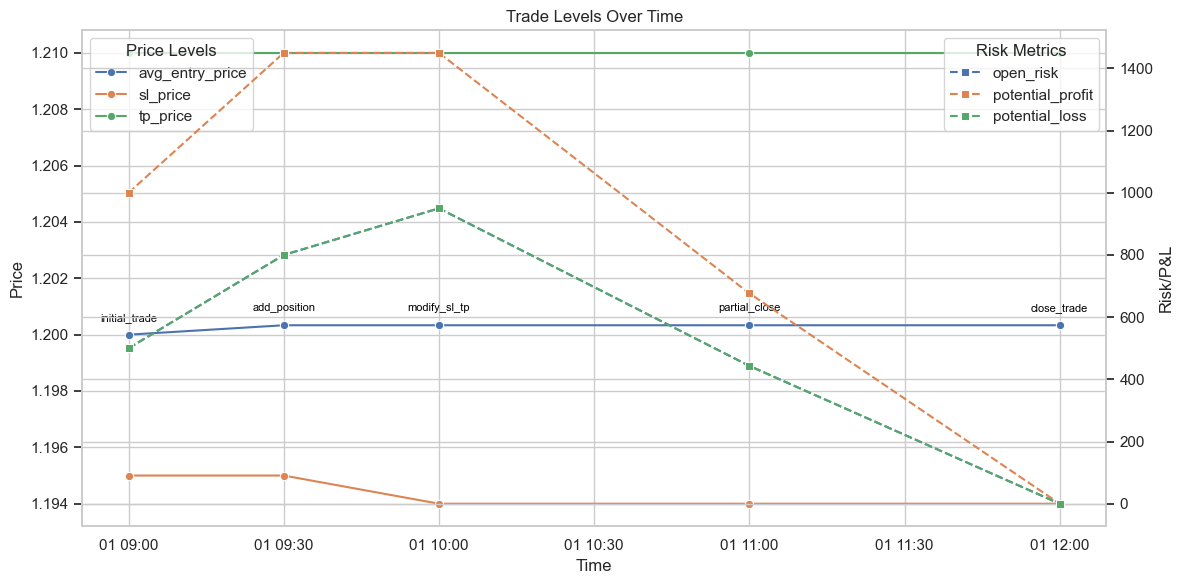

In [302]:
t.plot_trade_levels()